# TMA4135/TMA4130 Matematikk 4D/4N

Høst 2023

## Exercise 4: Bisection method

Consider the function
\begin{align}
f(x)=(1-3^x)x^2+4(x-1)3^x+4(1-x),
\end{align}
we want to find all roots of $f(x)$ on the interval $[-2,3]$.

These are the helping functions for

c) Use python to find the roots of $f(x)$ with an error smaller than $10^{-3}$.


In [ ]:
from collections.abc import Callable

import numpy as np

You can use the code from the notes:


In [1]:
def bisection(
    f: Callable[[float | np.ndarray], float | np.ndarray],
    a: float,
    b: float,
    *,
    tol: float = 1e-6,
    max_iter: int = 100,
    verbose: bool = True,
) -> tuple[float | np.ndarray, int]:
    """bisection(f, a, b, tol=1e-6, maxiter=100)

    Solve the scalar equation f(x) = 0 by bisection.

    Input:
        f    - the function
        a, b - the interval
    Optional (keyword arguments)
        tol      - (`1.0e-6`) a tolerance when to stop due to a small
                   interval
        max_iter - (`100`) a maximal number of iterations
        verbose  - (`True`) activates printing if set to true
    Output:
        r, k - the found root and the number of iterations needed
               to get to this point
    """
    fa = f(a)
    fb = f(b)

    if max_iter <= 0:
        raise ValueError("Max iterations must be greater than zero.")
    if fa * fb > 0:
        raise ValueError(
            "f(a) * f(b) > 0, there may be no root in the interval."
        )

    for k in range(max_iter):
        c = (a + b) / 2
        fc = f(c)

        if verbose:
            print(
                f"k={k:3d}, a={a:.6f}, b={b:.6f}, c={c:10.6f}, f(c)={fc:10.3e}"
            )

        if abs(fc) < tol:
            break
        if b - a < 2 * tol:
            break

        if fa * fc < 0:
            b = c
            # fb = f(b)
        else:
            a = c
            # fa = f(a)

    return c, k

Solution: Define the function f(x)


In [2]:
def f(x: float | np.ndarray) -> float | np.ndarray:
    return (1 - 3**x) * x**2 + 4 * (x - 1) * 3**x + 4 * (1 - x)


a, b = -2, 3
c, nit = bisection(f, a, b, tol=1e-3, max_iter=13)

k=  0, a=-2.000000, b=3.000000, c=  0.500000, f(c)=-1.647e+00
k=  1, a=-2.000000, b=0.500000, c= -0.750000, f(c)= 4.245e+00
k=  2, a=-0.750000, b=0.500000, c= -0.125000, f(c)= 5.794e-01
k=  3, a=-0.125000, b=0.500000, c=  0.187500, f(c)=-7.514e-01
k=  4, a=-0.125000, b=0.187500, c=  0.031250, f(c)=-1.354e-01
k=  5, a=-0.125000, b=0.031250, c= -0.046875, f(c)= 2.103e-01
k=  6, a=-0.046875, b=0.031250, c= -0.007812, f(c)= 3.445e-02
k=  7, a=-0.007812, b=0.031250, c=  0.011719, f(c)=-5.122e-02
k=  8, a=-0.007812, b=0.011719, c=  0.001953, f(c)=-8.575e-03
k=  9, a=-0.007812, b=0.001953, c= -0.002930, f(c)= 1.289e-02
k= 10, a=-0.002930, b=0.001953, c= -0.000488, f(c)= 2.146e-03
k= 11, a=-0.000488, b=0.001953, c=  0.000732, f(c)=-3.218e-03
k= 12, a=-0.000488, b=0.000732, c=  0.000122, f(c)=-5.364e-04


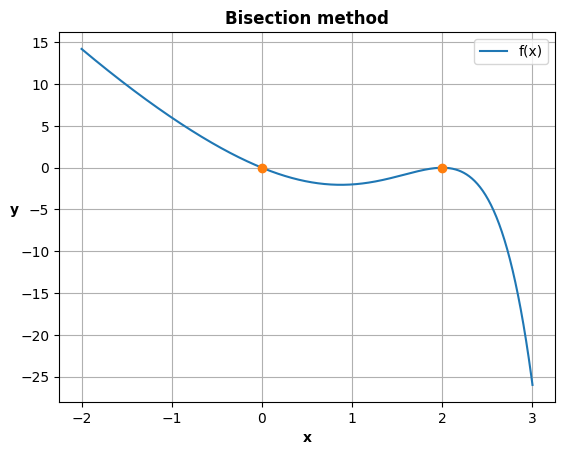

In [3]:
# plotting and saving of the function
import matplotlib.pyplot as plt


x = np.linspace(a, b, 1000)
fx = f(x)
plt.plot(x, fx, label="f(x)")
plt.plot((0, 2), (0, 0), "o")
plt.title("Bisection method", fontweight=1000)
plt.xlabel("x", fontweight=750)
plt.ylabel("y", rotation=0, fontweight=750)
plt.grid()
plt.legend()
plt.show()
# plt.savefig("BisectionMethod-problem1", dpi = 200)